# Importing necessary libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
sns.set_style('darkgrid')

# Data extraction and preparation

## Data extraction

In [4]:
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Basic data exploration

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
pd.isnull(df).sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


In [8]:
print('Unique fuel type values -->', df['Fuel_Type'].unique())
print('Unique seller type values -->', df['Seller_Type'].unique())
print('Unique transmission values -->', df['Transmission'].unique())
print('Unique Owner values -->', df['Owner'].unique())

Unique fuel type values --> ['Petrol' 'Diesel' 'CNG']
Unique seller type values --> ['Dealer' 'Individual']
Unique transmission values --> ['Manual' 'Automatic']
Unique Owner values --> [0 1 3]


## Data Preparation

In [9]:
final_df = df.drop(['Car_Name'], axis=1)

In [10]:
final_df['no_year'] = 2020 - final_df['Year']
final_df.drop(['Year'], axis=1, inplace=True)
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [11]:
final_df = pd.get_dummies(final_df, drop_first=True)
final_df

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,4,1,0,0,1
297,4.00,5.90,60000,0,5,0,1,0,1
298,3.35,11.00,87934,0,11,0,1,0,1
299,11.50,12.50,9000,0,3,1,0,0,1


# Exploratory data analysis

## Correlation analysis(pairplot)

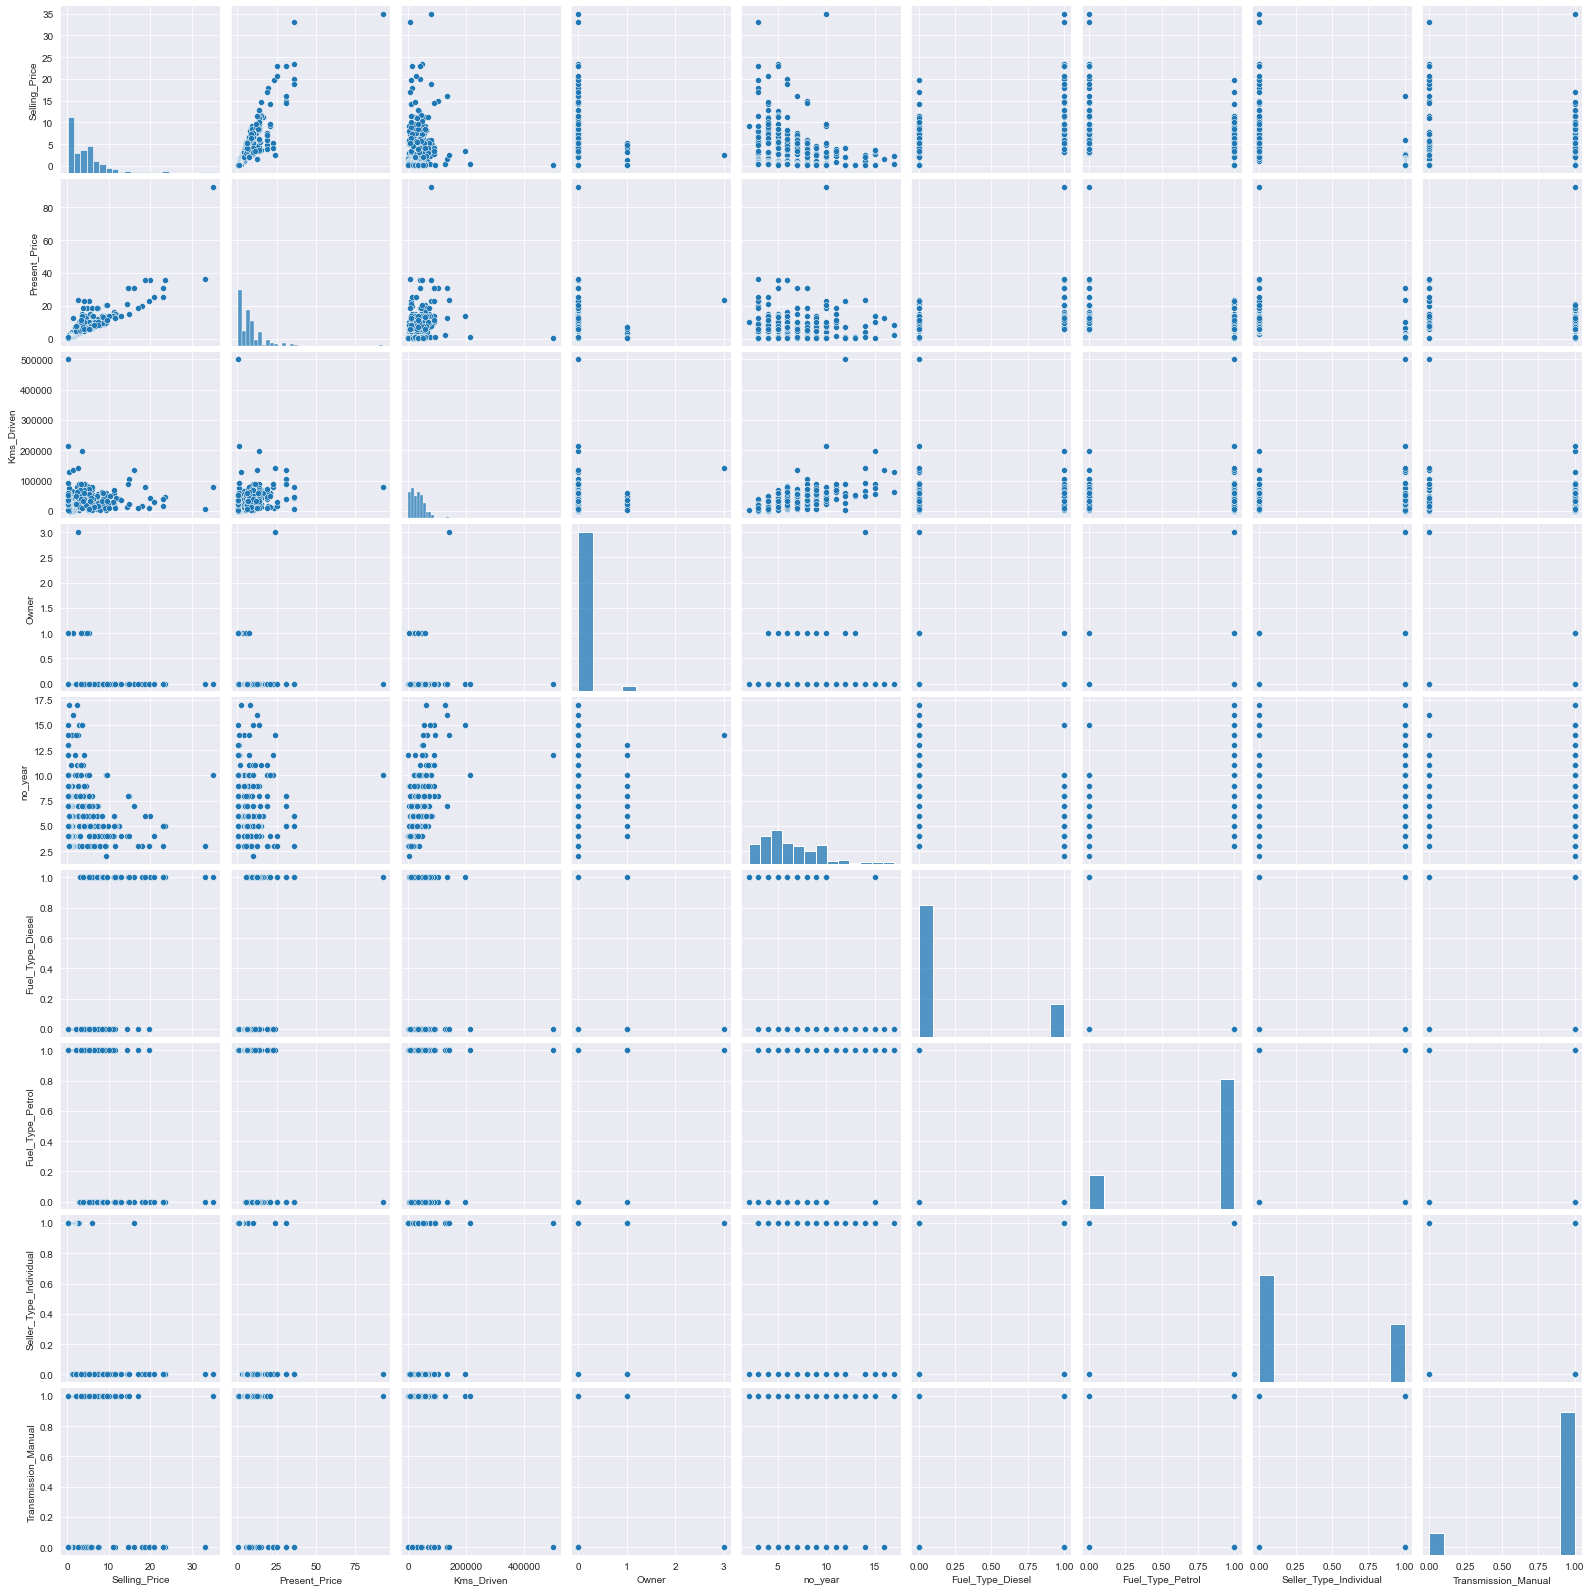

In [12]:
sns.pairplot(final_df)
plt.show()

## Correlation analysis(heatmap)

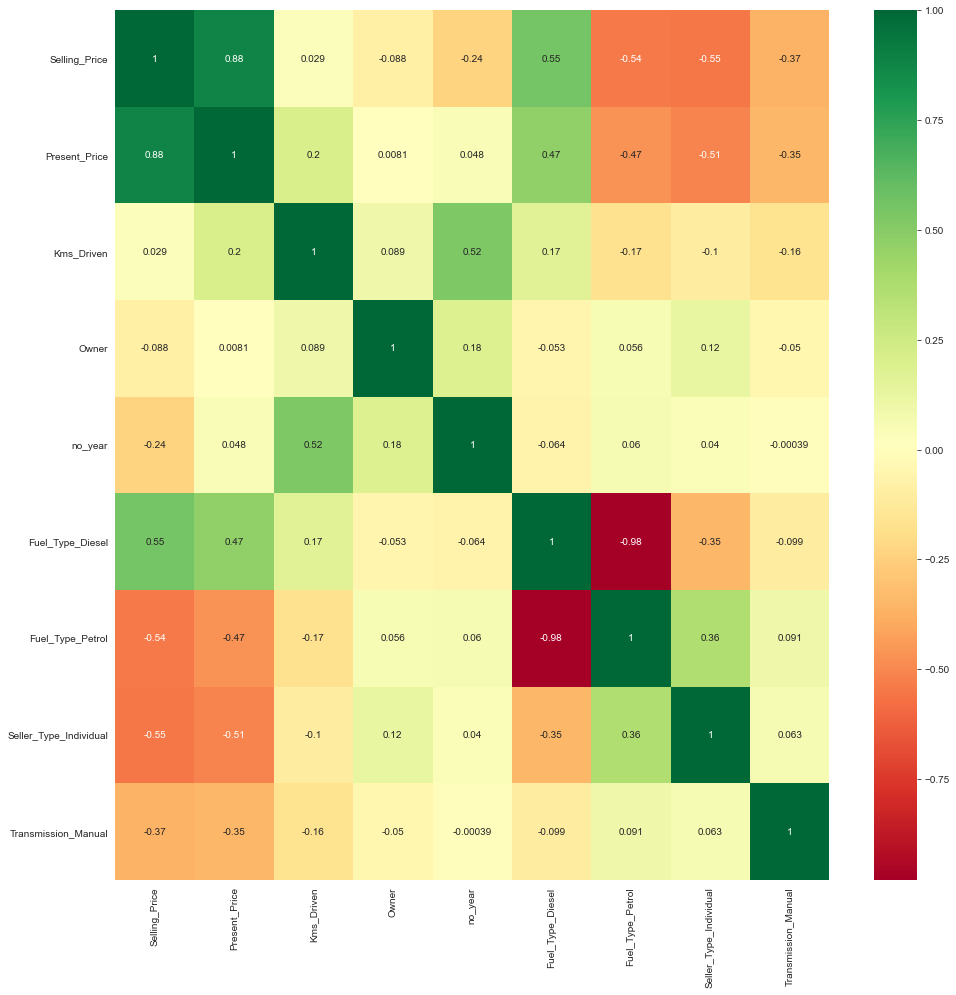

In [13]:
plt.figure(figsize=(16,16))
sns.heatmap(final_df.corr(), annot=True, cmap='RdYlGn')
plt.show()

## Feature importance

In [14]:
X = final_df.drop(['Selling_Price'], axis=1)
Y = final_df['Selling_Price']

In [15]:
from sklearn.ensemble import ExtraTreesRegressor

model_fi = ExtraTreesRegressor()
model_fi.fit(X, Y)

ExtraTreesRegressor()

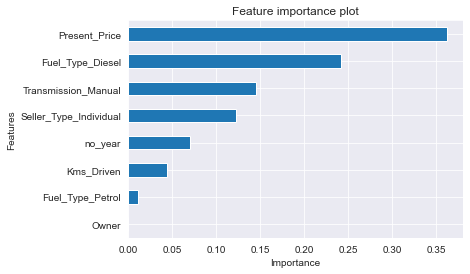

In [16]:
feat_importance = pd.Series(model_fi.feature_importances_, index=X.columns)
feat_importance.sort_values(ascending=True).plot(kind='barh')
plt.title('Feature importance plot')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Train/Test split

In [17]:
X = np.array(X)
Y = np.array(Y)


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

# Models

In [19]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

## Hyperparameters tuning

In [20]:
from sklearn.model_selection import RandomizedSearchCV

In [21]:
n_estimators = list(np.arange(start=100, stop=1200, step=100, dtype='int64')) 

In [22]:
model_params = {
        'model': rf,
        'params': {
           'n_estimators': n_estimators 
        }
}

In [23]:
scores = []

best_model = RandomizedSearchCV(estimator=model_params['model'], 
                                param_distributions=model_params['params'], 
                                scoring='neg_mean_squared_error',
                                n_iter=10, 
                                cv=5,
                                verbose=0)
best_model.fit(X_train, Y_train)
    
scores.append({
    'model':'Random Forest',
    'Best Score':best_model.best_score_,
    'Best Parameter':best_model.best_params_
})

In [24]:
best_params = pd.DataFrame(scores)
best_params

,model,Best Score,Best Parameter
0,Random Forest,-2.220325,{'n_estimators': 300}


## Prediction on test data-set

In [25]:
prediction_test = best_model.predict(X_test)

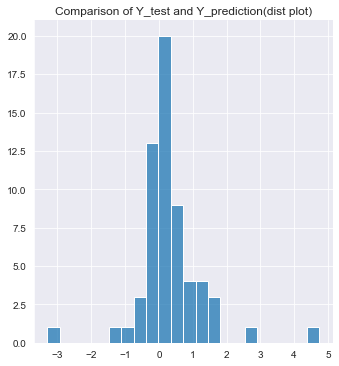

In [26]:
sns.displot(Y_test-prediction_test)
plt.title('Comparison of Y_test and Y_prediction(dist plot)')
plt.ylabel('')
plt.show()

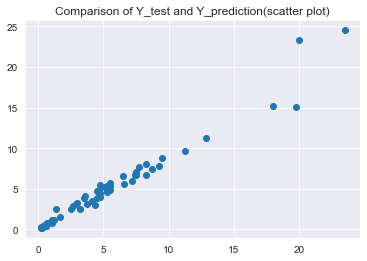

In [27]:
plt.scatter(Y_test, prediction_test)
plt.title('Comparison of Y_test and Y_prediction(scatter plot)')
plt.show()

## Saving the best model

In [28]:
import joblib

file = open('car_price_prediction.pkl', 'wb')
joblib.dump(best_model, file)

In [29]:
# Load the model using
# model = joblib.load(open('car_price_prediction.pkl', 'rb'))